<a href="https://colab.research.google.com/github/Gobihanath/ML-energy-consumption-prediction-carbon-emission-forecasting/blob/main/Code/Energy-Trends/Energy_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
### import dependencies and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'19APC3970_DBMS_Class Assignment 1.zip'
 19APC3970-English.pdf
 19APC3970_FWT_QUIZ02.pdf
'19APC3970 HTML-01 (1).zip'
'19APC3970 HTML-01.zip'
'19APC3970 HTML _1.rar'
 19APC3970.LOG2.docx
 19APC3970.LOG.docx
 19APC3970_QUIZ02.pdf
 19APC3970-Quiz03.pdf
 20240216_091107.jpg
 20240216_091245.jpg
 20240216_091320.jpg
 20240216_095746.jpg
 20240216_170935.jpg
 Abstract
 Abstract.gdoc
 Attendence1.jpg
'Author Declaration Form IRCFoT-2025_V2.docx'
'Balancing Academic and Non-Academic Workload: Stress Assessment .gform'
'Balancing Academic and Non-Academic Workload: Stress Assessment  (Responses).gsheet'
 Banana1.jpg
 Banana2.jpg
 BI-Report.gdoc
'CamScanner 08-26-2022 13.34.jpg'
'CamScanner 11-05-2021 11.58_1.pdf'
'CamScanner 11-05-2021 11.58.pdf'
'Capstone Project - Group 22'
 CIS
 Classroom
'Colab 

In [3]:
%cd /mydrive/Dataset/

/content/gdrive/My Drive/Dataset


In [4]:
import pandas as pd
df = pd.read_csv("energy_trends.csv")

In [5]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [7]:
def preprocess(data):

  data = data.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)'])

  data = data.dropna()

  label_encoder = LabelEncoder()
  data['Country'] = label_encoder.fit_transform(data['Entity'])
  data = data.drop(columns=['Entity'])

  return data



In [8]:
df_new = preprocess(df)
df_new

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Country
3,2003,14.738506,9.50,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.939110,67.709953,0
4,2004,20.064968,10.90,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.939110,67.709953,0
5,2005,25.390894,12.20,7.51,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60,652230.0,33.939110,67.709953,0
6,2006,30.718690,13.85,7.40,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60,652230.0,33.939110,67.709953,0
7,2007,36.051010,15.30,7.25,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60,652230.0,33.939110,67.709953,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,2015,33.700000,29.50,63.54,80.82,4.02,0.0,5.37,57.188496,3860.92020,10.36,12430.000310,1.779873,1445.069702,38,390757.0,-19.015438,29.154857,107
3644,2016,42.561730,29.80,62.88,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0,-19.015438,29.154857,107
3645,2017,44.178635,29.80,62.33,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0,-19.015438,29.154857,107
3646,2018,45.572647,29.90,82.53,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0,-19.015438,29.154857,107


In [9]:
import pandas as pd
import plotly.express as px

average_energy_per_country = df.groupby('Entity')['Primary energy consumption per capita (kWh/person)'].mean().reset_index()

################### Rename columns for clarity

average_energy_per_country.columns = ['Country', 'Average Energy Consumption per Capita']

# Plotting the choropleth map
fig = px.choropleth(
    average_energy_per_country,
    locations='Country',
    locationmode='country names',
    color='Average Energy Consumption per Capita',
    hover_name='Country',
    color_continuous_scale='Viridis',
    title='Average Primary Energy Consumption per Capita by Country'
)

# Show the map
fig.show()

## 1. Energy Consumption over time --- Average

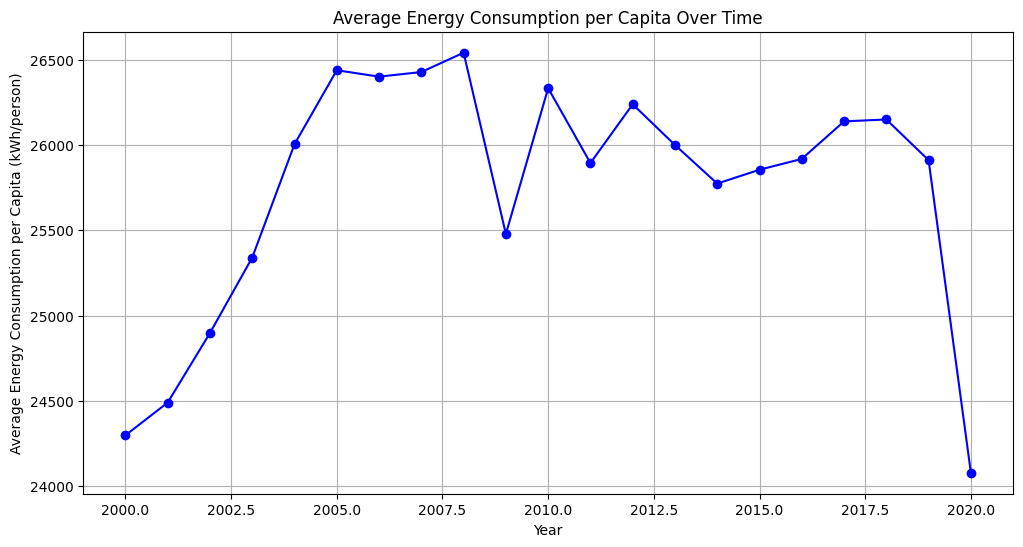

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Year' and calculate the mean of 'Primary energy consumption per capita (kWh/person)'
average_energy_consumption = df.groupby('Year')['Primary energy consumption per capita (kWh/person)'].mean().reset_index()

# Plotting the average energy consumption over time
plt.figure(figsize=(12, 6))
plt.plot(average_energy_consumption['Year'], average_energy_consumption['Primary energy consumption per capita (kWh/person)'], color='b', marker='o')
plt.title('Average Energy Consumption per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Average Energy Consumption per Capita (kWh/person)')
plt.grid(True)
plt.show()

# 2. CO2 Emission over time -- **Average**

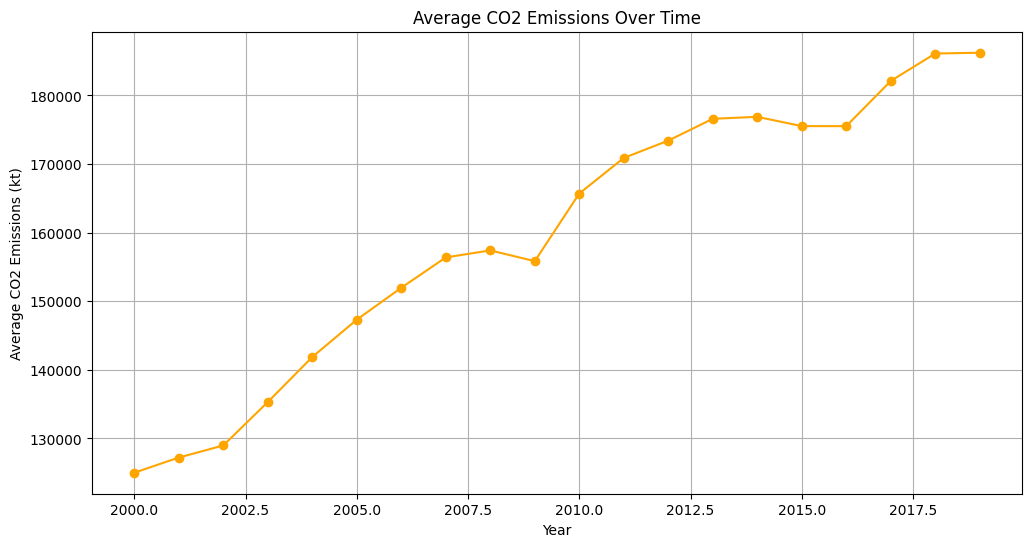

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

average_co2_emissions = df.groupby('Year')['Value_co2_emissions_kt_by_country'].mean().reset_index()

# Plotting the average CO2 emissions over time
plt.figure(figsize=(12, 6))
plt.plot(average_co2_emissions['Year'], average_co2_emissions['Value_co2_emissions_kt_by_country'], color='orange', marker='o')
plt.title('Average CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (kt)')
plt.grid(True)
plt.show()


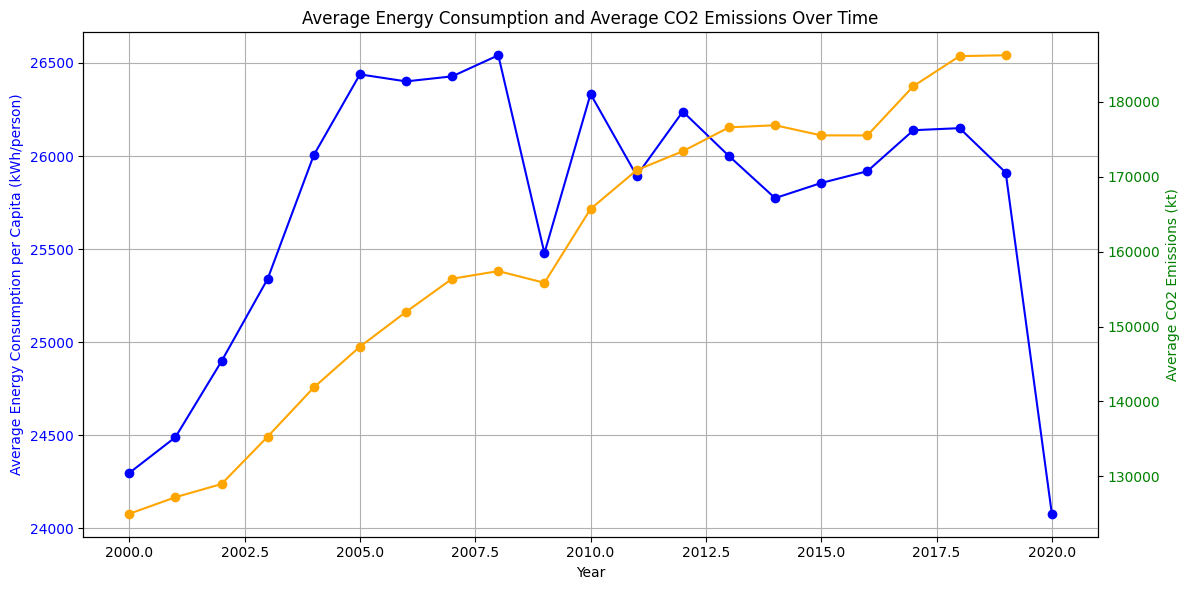

In [12]:
# Group by 'Year' and calculate the mean of 'Primary energy consumption per capita (kWh/person)' and 'Value_co2_emissions_kt_by_country'
average_data = df.groupby('Year')[['Primary energy consumption per capita (kWh/person)', 'Value_co2_emissions_kt_by_country']].mean().reset_index()

# Plotting the average energy consumption and CO2 emissions over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting average energy consumption
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Energy Consumption per Capita (kWh/person)', color='b')
ax1.plot(average_data['Year'], average_data['Primary energy consumption per capita (kWh/person)'], color='b', marker='o', label='Energy Consumption')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for CO2 emissions
ax2 = ax1.twinx()
ax2.set_ylabel('Average CO2 Emissions (kt)', color='g')
ax2.plot(average_data['Year'], average_data['Value_co2_emissions_kt_by_country'], color='orange', marker='o', label='CO2 Emissions')
ax2.tick_params(axis='y', labelcolor='g')

# Title and grid
plt.title('Average Energy Consumption and Average CO2 Emissions Over Time')
ax1.grid(True)

# Show plot
fig.tight_layout()
plt.show()

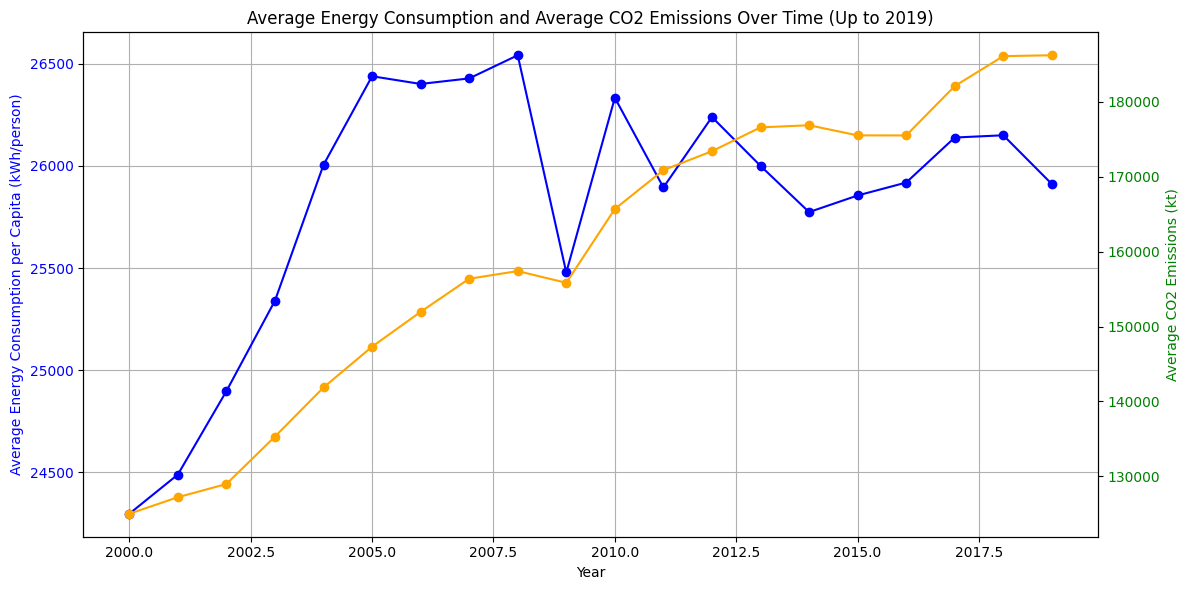

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to exclude data from 2020
df_filtered = df[df['Year'] <= 2019]

# Group by 'Year' and calculate the mean of 'Primary energy consumption per capita (kWh/person)' and 'Value_co2_emissions_kt_by_country'
average_data = df_filtered.groupby('Year')[['Primary energy consumption per capita (kWh/person)', 'Value_co2_emissions_kt_by_country']].mean().reset_index()

# Plotting the average energy consumption and CO2 emissions over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting average energy consumption
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Energy Consumption per Capita (kWh/person)', color='b')
ax1.plot(average_data['Year'], average_data['Primary energy consumption per capita (kWh/person)'], color='b', marker='o', label='Energy Consumption')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for CO2 emissions
ax2 = ax1.twinx()
ax2.set_ylabel('Average CO2 Emissions (kt)', color='g')
ax2.plot(average_data['Year'], average_data['Value_co2_emissions_kt_by_country'], color='orange', marker='o', label='CO2 Emissions')
ax2.tick_params(axis='y', labelcolor='g')

# Title and grid
plt.title('Average Energy Consumption and Average CO2 Emissions Over Time (Up to 2019)')
ax1.grid(True)

# Show plot
fig.tight_layout()
plt.show()


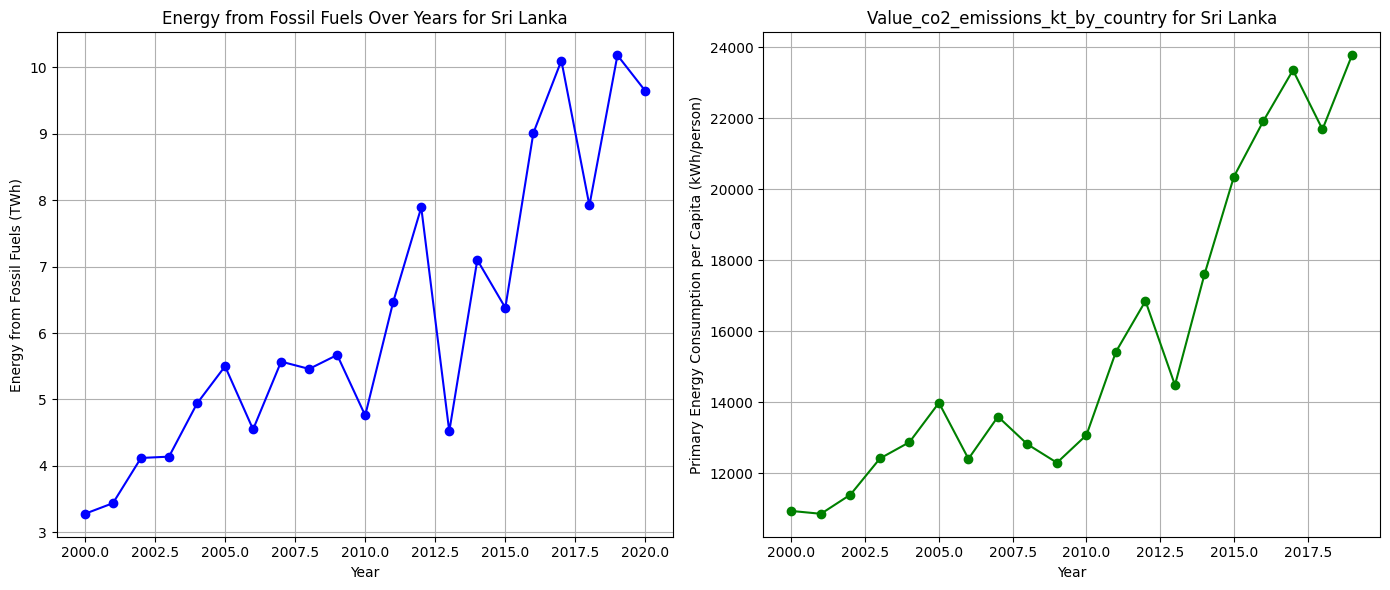

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the country
country_name = 'Sri Lanka'

# Filter the DataFrame for the specified country
country_data = df[df['Entity'] == country_name]  # Replace 'Entity' with the actual column name for the country

# Create side-by-side subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Energy from fossil fuels
ax[0].plot(country_data['Year'], country_data['Electricity from fossil fuels (TWh)'], label='Energy from Fossil Fuels (TWh)', color='b', marker='o')
ax[0].set_title(f'Energy from Fossil Fuels Over Years for {country_name}')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Energy from Fossil Fuels (TWh)')
ax[0].grid(True)

# Plot for Primary energy consumption per capita
ax[1].plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label='Value_co2_emissions_kt_by_country', color='g', marker='o')
ax[1].set_title(f'Value_co2_emissions_kt_by_country for {country_name}')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Primary Energy Consumption per Capita (kWh/person)')
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


<ipython-input-14-f4110cc9913f>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



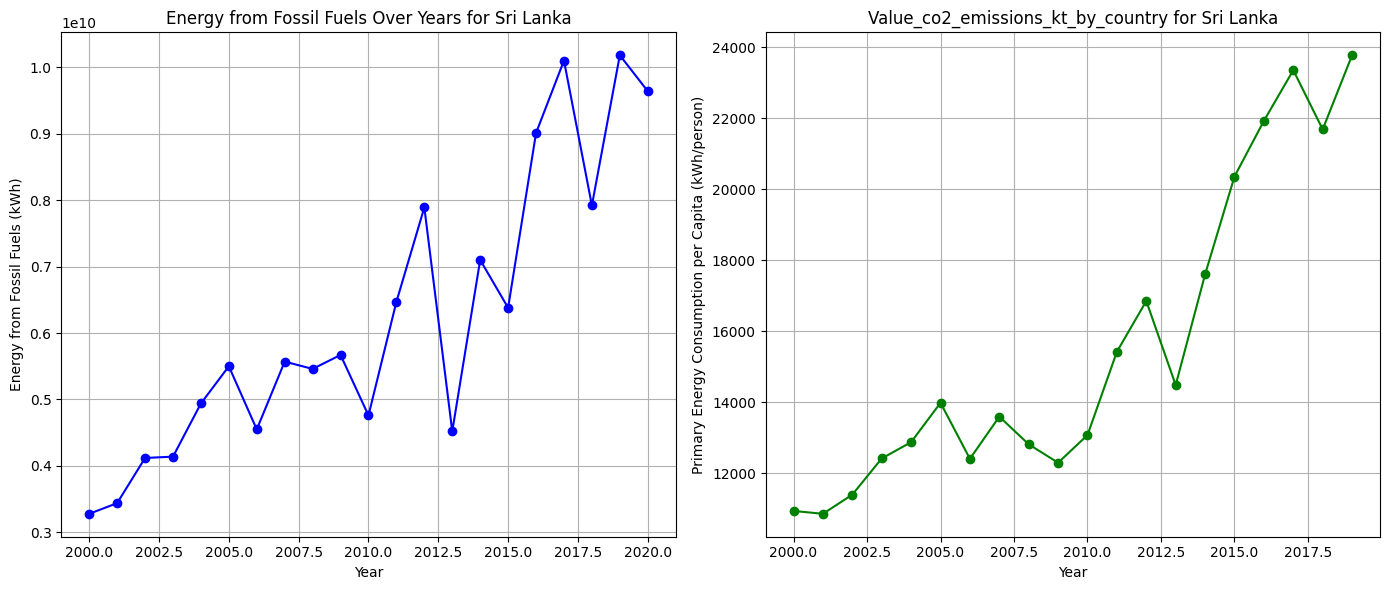

In [14]:
### ---------------- converting  energy from fossil fuels from TWh to kWh  --------------------------------

# Specify the country
country_name = 'Sri Lanka'

# Filter the DataFrame for the specified country
country_data = df[df['Entity'] == country_name]  # Replace 'Entity' with the actual column name for the country

# Convert energy from fossil fuels from TWh to kWh
country_data['Energy from Fossil Fuels (kWh)'] = country_data['Electricity from fossil fuels (TWh)'] * 1e9

# Create side-by-side subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Energy from fossil fuels (converted to kWh)
ax[0].plot(country_data['Year'], country_data['Energy from Fossil Fuels (kWh)'], label='Energy from Fossil Fuels (kWh)', color='b', marker='o')
ax[0].set_title(f'Energy from Fossil Fuels Over Years for {country_name}')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Energy from Fossil Fuels (kWh)')
ax[0].grid(True)

# Plot for Primary energy consumption per capita
ax[1].plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label='Value_co2_emissions_kt_by_country', color='g', marker='o')
ax[1].set_title(f'Value_co2_emissions_kt_by_country for {country_name}')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Primary Energy Consumption per Capita (kWh/person)')
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
